youtube 이수안 컴퓨터
XGBoost, LightGBM

In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumGothic'


In [169]:
df=pd.read_csv('revised_final_fire_weather_7yr.csv')

In [170]:
df.head()

,산불발생여부,발생장소_시도,관측일,일최고기온,일평균현지기압,일최고현지기압,일최저현지기압,일평균해면기압,일최고해면기압,일최저해면기압,...,일평균풍속,일최대풍속,일최대풍속풍향,일최대순간풍속,일최대순간풍속풍향,풍정합,일강수량,일평균전운량,최다운량,일합계일사량
0,0,강원,20140101,6.362,985.015,988.123,982.354,1012.215,1015.362,1009.331,...,3.985,7.831,237.692,14.585,256.923,3449.692,0.0,2.850,8.00,6.922
1,0,경북,20140101,8.686,998.207,1000.529,994.764,1013.293,1015.679,1009.800,...,3.557,7.436,276.429,13.836,277.857,3067.286,0.1,2.075,6.25,9.260
2,0,경북,20140102,8.664,1004.921,1006.907,1000.486,1020.286,1022.336,1015.629,...,2.300,5.436,262.857,9.036,288.571,1984.714,0.0,2.600,6.00,9.880
3,0,강원,20140102,6.285,992.546,994.338,988.092,1020.215,1022.254,1015.331,...,1.746,4.692,212.308,7.931,260.000,1521.385,0.0,0.167,1.50,8.726
4,0,강원,20140103,7.123,989.377,992.823,986.615,1016.862,1020.877,1013.477,...,1.700,4.631,219.231,7.546,240.000,1474.615,0.0,6.117,8.50,5.204


In [171]:
df.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '일최고기온', '일평균현지기압', '일최고현지기압', '일최저현지기압',
       '일평균해면기압', '일최고해면기압', '일최저해면기압', '일평균상대습도', '일최소상대습도', '일평균수증기압',
       '일최고수증기압', '일최저수증기압', '일평균풍속', '일최대풍속', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속풍향', '풍정합', '일강수량', '일평균전운량', '최다운량', '일합계일사량'],
      dtype='object')

In [172]:
#시계열 그래프를 그리기 쉽도록 관측일을 날짜타입으로 변경
df['관측일']=pd.to_datetime(df['관측일'],format='%Y%m%d')

In [173]:
df['관측일']

0      2014-01-01
1      2014-01-01
2      2014-01-02
3      2014-01-02
4      2014-01-03
          ...    
5497   2020-12-29
5498   2020-12-30
5499   2020-12-30
5500   2020-12-31
5501   2020-12-31
Name: 관측일, Length: 5502, dtype: datetime64[ns]

In [174]:
df_3_gangwon=df[(df.발생장소_시도=='강원')&(df.관측일.dt.month==3)]

In [175]:
df_3_yearly_gangwon=df_3_gangwon.groupby(df['관측일'].dt.year).mean()
df_3_yearly_gangwon.reset_index(inplace=True)

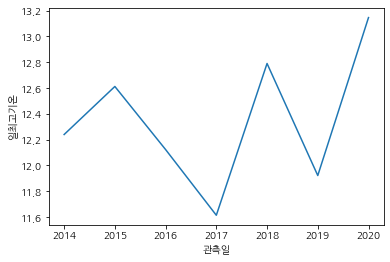

In [176]:
ax=sns.lineplot(x='관측일', y='일최고기온', data=df_3_yearly_gangwon)

In [177]:
df24=pd.read_csv('24yr.csv')

In [178]:
df24.head()

,평균풍향,최대풍향,피해면적,피해액,진화소요시간(분),진화일시(년월일시분),실효습도,최소습도,상대습도,발생세부원인,...,발생장소(시군구),발생일시(요일),소유구분,최종강우량,강우경과일수,산불위험지수(평균),산불위험지수(최대),평균기온,평균풍속,최대풍속
0,SE,S,0.19,0,300.0,201406191800,0.0,0.0,57.0,쓰레기소각,...,인제,목,NaN,0.5,6,0.0,0.0,23.6,1.9,5.6
1,NNE,SE,0.08,0,210.0,201406182015,0.0,0.0,46.0,담뱃불실화 추정,...,밀양,수,NaN,1.5,6,0.0,0.0,29.6,2.4,4.0
2,NW,SSW,0.05,0,310.0,201406151720,0.0,0.0,57.0,도로공사(용접불티)비화,...,인제,일,NaN,0.5,2,0.0,0.0,29.3,1.3,6.7
3,WNW,W,0.03,0,140.0,201406141900,0.0,0.0,46.0,등산객실화 추정,...,부안,토,NaN,1.5,3,0.0,0.0,25.3,3.3,7.8
4,NNE,SSE,0.01,0,242.0,201406102000,0.0,0.0,40.0,낙뢰추정,...,원주,화,NaN,0.5,1,0.0,0.0,22.3,2.0,9.9


In [179]:
df24['발생장소(시도)'].unique()

array(['강원', '경남', '전북', '충북', '경북', '서울', '대전', '경기', '광주', '전남', '부산',
       '인천', '충남', '울산', '대구', '세종', '제주', '출북', '서부'], dtype=object)

In [180]:
df24.columns

Index(['평균풍향', '최대풍향', '피해면적', '피해액', '진화소요시간(분)', '진화일시(년월일시분)', '실효습도',
       '최소습도', '상대습도', '발생세부원인', '발생장소(시도)', '발생일시', '발생장소(읍면동)', '발생장소(관서)',
       '발생장소(지번)', '발생장소(리)', '발생장소(시군구)', '발생일시(요일)', '소유구분', '최종강우량',
       '강우경과일수', '산불위험지수(평균)', '산불위험지수(최대)', '평균기온', '평균풍속', '최대풍속'],
      dtype='object')

In [181]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9561 entries, 0 to 9560
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   평균풍향         9560 non-null   object 
 1   최대풍향         1322 non-null   object 
 2   피해면적         9561 non-null   float64
 3   피해액          9561 non-null   int64  
 4   진화소요시간(분)    9560 non-null   float64
 5   진화일시(년월일시분)  9561 non-null   int64  
 6   실효습도         9561 non-null   float64
 7   최소습도         9561 non-null   float64
 8   상대습도         9561 non-null   float64
 9   발생세부원인       9561 non-null   object 
 10  발생장소(시도)     9561 non-null   object 
 11  발생일시         9561 non-null   int64  
 12  발생장소(읍면동)    9561 non-null   object 
 13  발생장소(관서)     9523 non-null   object 
 14  발생장소(지번)     9514 non-null   object 
 15  발생장소(리)      7069 non-null   object 
 16  발생장소(시군구)    9561 non-null   object 
 17  발생일시(요일)     9561 non-null   object 
 18  소유구분         8842 non-null   object 
 19  최종강우량 

In [184]:
df24['진화일시(년월일시분)']=df24['진화일시(년월일시분)'].astype('str')

In [185]:
df24['진화일시(년월일시분)']=df24['진화일시(년월일시분)'].str[:8]

In [186]:
df24['진화일시(년월일시분)']

0       201406191
1       201406182
2       201406151
3       201406141
4       201406102
          ...    
9556    199101311
9557    199101300
9558    199101300
9559    199101271
9560    199101141
Name: 진화일시(년월일시분), Length: 9561, dtype: object

In [ ]:
df24['진화일시(년월일시분)']=df24['진화일시(년월일시분)'][:9]

In [160]:
#시계열 그래프를 그리기 쉽도록 관측일을 날짜타입으로 변경
df24['진화일시(년월일시분)']=pd.to_datetime(df24['진화일시(년월일시분)'],format='%Y%m%d %h:%m')

ValueError: 'h' is a bad directive in format '%Y%m%d %h:%m'

In [144]:
df24['진화일시(년월일시분)']

0      1970-01-01 00:03:21.406191800
1      1970-01-01 00:03:21.406182015
2      1970-01-01 00:03:21.406151720
3      1970-01-01 00:03:21.406141900
4      1970-01-01 00:03:21.406102000
                    ...             
9556   1970-01-01 00:03:19.101311235
9557   1970-01-01 00:03:19.101300730
9558   1970-01-01 00:03:19.101300000
9559   1970-01-01 00:03:19.101271455
9560   1970-01-01 00:03:19.101141455
Name: 진화일시(년월일시분), Length: 9561, dtype: datetime64[ns]

In [125]:
df24_3_gangwon=df24[(df24['발생장소(시도)']=='강원')&(df24['진화일시(년월일시분)'].dt.month==3)]

In [126]:
df24_3_yearly_gangwon=df24_3_gangwon.groupby(df24['진화일시(년월일시분)'].dt.year).mean()
df24_3_yearly_gangwon.reset_index(inplace=True)

In [128]:
df24_3_yearly_gangwon

,진화일시(년월일시분),피해면적,피해액,진화소요시간(분),실효습도,최소습도,상대습도,발생일시,최종강우량,강우경과일수,산불위험지수(평균),산불위험지수(최대),평균기온,평균풍속,최대풍속


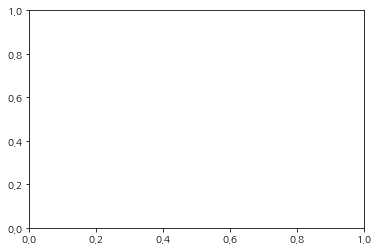

In [127]:
ax=sns.lineplot(x='진화일시(년월일시분)', y='평균기온', data=df24_3_yearly_gangwon)

c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


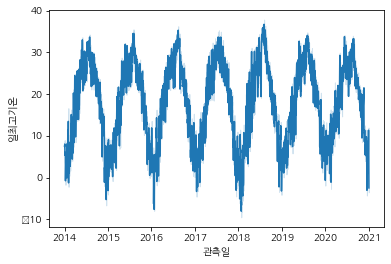

In [19]:
ax=sns.lineplot(x='관측일', y='일최고기온', data=df_plot)

(array([15706., 16071., 16436., 16801., 17167., 17532., 17897., 18262.,
        18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

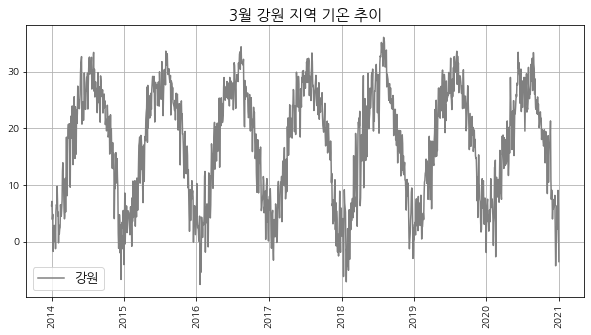

In [30]:
spot_ = '강원'
d_ = df[(df["발생장소_시도"]==spot_) & (df["관측일"].dt.day)]
plt.figure(figsize=(10,5))
plt.title("3월 %s 지역 기온 추이" % spot_, fontsize=15)
plt.plot(d_["관측일"], d_["일최고기온"], "-", color='grey', label=str(spot_))
plt.grid()
plt.legend(fontsize=13)
plt.xticks(rotation=90)

In [7]:
#변수지정
# x = df[['평균기온', '일최고기온', '일최고기온시각', '일최저기온',
#        '일최저기온시각', '일평균현지기압', '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압',
#        '일최저해면기압시각', '일평균상대습도', '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압',
#        '일최고수증기압시각', '일최저수증기압', '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각',
#        '일최대풍속풍향', '일최대순간풍속', '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량',
#        '일평균중하층운량', '최다운량', '최다운량시각', '일합계일조시간', '일합계일사량', '일평균지면온도']]
# x=df[['dayMaxT','dayMinT','dayAvgP','dayAvgPsea','dayMaxPsea','dayMinPsea',
#       'dayAvgRhm','dayMinRhm','dayAvgWaterP','dayMaxWaterP','dayMinWaterP',
#       'dayAvgWS','dayMaxWS','dayMaxWSWD','dayMaxInsWS','dayMaxInsWSWD','dayAvgCloud',
#       'dayAvgMiddleLowCloud','daySumSunRay','dayAvgGroundT']]

#모든 변수를 적용하여 변수중요도 그래프에서 상위 변수들로만 다시 적용(표기가 애매한 시각관련 변수도 제외)
x=df[['일최고기온', '일평균현지기압', '일최고현지기압', '일최저현지기압',
       '일평균해면기압', '일최고해면기압', '일최저해면기압', '일평균상대습도', '일최소상대습도', '일평균수증기압',
       '일최고수증기압', '일최저수증기압', '일평균풍속', '일최대풍속', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속풍향', '풍정합', '일강수량', '일평균전운량', '최다운량', '일합계일사량']]
y = df[['산불발생여부']]

In [8]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=123)
print(X_train.shape, X_test.shape)

(4401, 22) (1101, 22)


In [9]:
#파이썬 기반의 XGBoost가 가지고 있는 고유의 구조를 가지는 클래스를 가지고 있음
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test, label=y_test)

In [10]:
params={
    # max_depth:최대 트리의 깊이(N이라고 가정하면 2^N개의 리프 노드가 생김), 일반적으로 Feature 수에 따라 3~6으로 세팅한 후 성능이 증가하고, 오버 피팅이 나지 않을 때까지 늘려나감(기본값 6)
    #'max_depth':3, #F1-score:0.5924
    #'max_depth':4, #F1-score:0.6394
    #'max_depth':5, #F1-score:0.6422
    'max_depth':6, #F1-score:0.6581

    # eta: learning_rate, 낮은 값일수록 모델이 견고해지고 오버 피팅 방지에 좋음(일반적으로 0.01 ~ 0.3 정도로 설정, 기본값 0.3)
    #'eta':0.1, #F1-score:0.6581
    #'eta':0.2, #F1-score:0.6652
    'eta':0.3, #F1-score:0.6752

    # objective:목적함수,이항 분류(binary class)에는 대부분 binary:logistic만 사용
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    # early_stopping:오류가 더 이상 개선되지 않으면 수행을 중지
    #'early_stopping':100 #F1-score:0.6752
    'early_stopping':50 #F1-score:0.6752
}

# XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지(early_stopping기능)
# 예를 들면 n_estimators 를 200으로 설정하고, 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가
# 50회를 반복하는 동안 학습오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료합니다.
# (가령 100회에서 학습오류 값이 0.8인데 101~150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅을 종료)

num_rounds=400 #F1-score:0.6752
#num_rounds=800 #F1-score:0.6752
#num_rounds=1200 #F1-score:0.6752
#num_rounds가 영향을 안미치는 이유:early-stopping 때문

#과적합 제어
#-eta 값을 낮추기(0.01 ~ 0.1) → eta 값을 낮추면 num_boost_round(n_estimator)를 반대로 높여주어야 함.
#-max_depth 값을 낮추기

In [11]:
evals=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, 
                    early_stopping_rounds=100, evals=evals)

[01:28:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.55058	eval-logloss:0.57131
[1]	train-logloss:0.46659	eval-logloss:0.50175
[2]	train-logloss:0.41252	eval-logloss:0.46110
[3]	train-logloss:0.37384	eval-logloss:0.43380
[4]	train-logloss:0.34756	eval-logloss:0.41729
[5]	train-logloss:0.32750	eval-logloss:0.40600
[6]	train-logloss:0.31061	eval-logloss:0.39965
[7]	train-logloss:0.30052	eval-logloss:0.39422
[8]	train-logloss:0.29193	eval-logloss:0.39135
[9]	train-logloss:0.28366	eval-logloss:0.38956
[10]	train-logloss:0.27642	eval-logloss:0.38743
[11]	train-logloss:0.27255	e

In [12]:
predicts=xgb_model.predict(dtest)
np.round(predicts[:10],3)

array([0.108, 0.582, 0.   , 0.028, 0.014, 0.563, 0.002, 0.97 , 0.006,
       0.085], dtype=float32)

In [13]:
preds=[1 if x>0.5 else 0 for x in predicts]
preds[:10]

[0, 1, 0, 0, 0, 1, 0, 1, 0, 0]

In [14]:
#정확도(Accuracy) =  전체 데이터 중 예측이 참인 것의 비율((TP+TN)/(TP+TN+FP+FN)->이진 분류의 경우 데이터의 구성에 따라 모델 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않음
#정밀도(precision score):예측이 참인 것 중에 실제도 참인 것의 비율(TP/TP+FP) 
#재현율(recall score):실제 참인 것 중에 예측도 참인 것의 비율(TP/TP+FP)
print('정확도:{}'.format(accuracy_score(y_test,preds)))
print('정밀도:{}'.format(precision_score(y_test,preds)))
print('재현율:{}'.format(recall_score(y_test,preds)))

정확도:0.849227974568574
정밀도:0.751219512195122
재현율:0.5724907063197026


In [15]:
#F1:precision 과 recall의 조화평균(2*(precision*recall)/(precision+recall))
from sklearn.metrics import f1_score
f1_score(y_test, preds)

0.6497890295358649

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ejju/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.ca

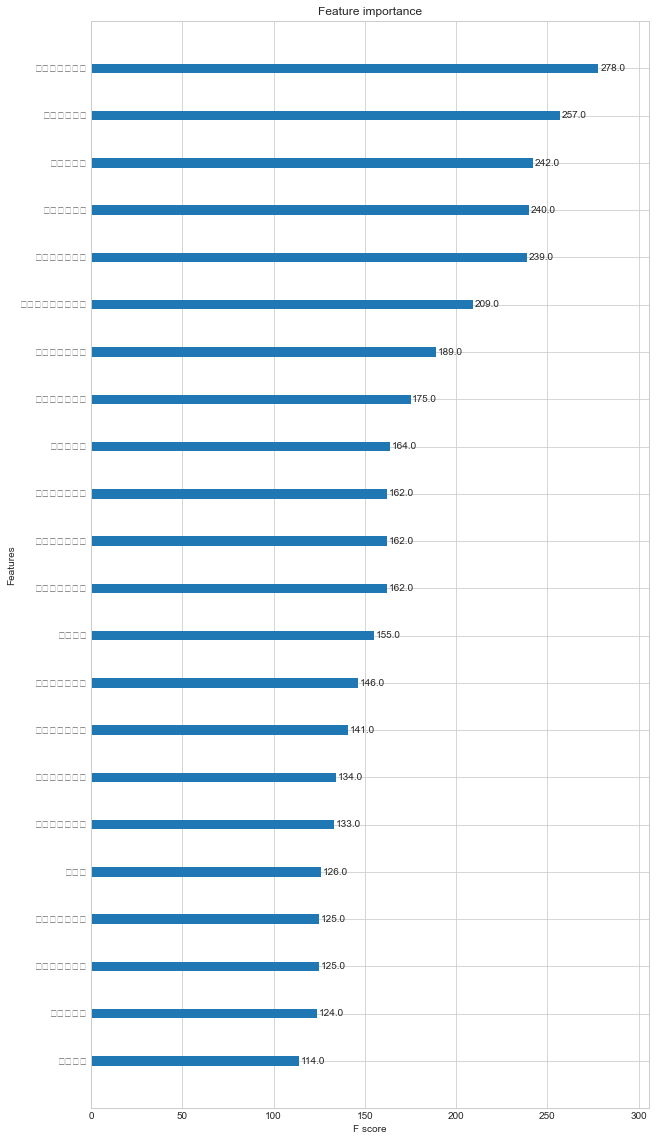

In [16]:
fig, ax=plt.subplots(figsize=(10,20))
plot_importance(xgb_model,ax=ax)